<a href="https://colab.research.google.com/github/shxvaayy/OASIS-INFOBYTE/blob/main/Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("car_data.csv")

In [ ]:
dataset.isnull().sum()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Range of years: 2003 to 2018


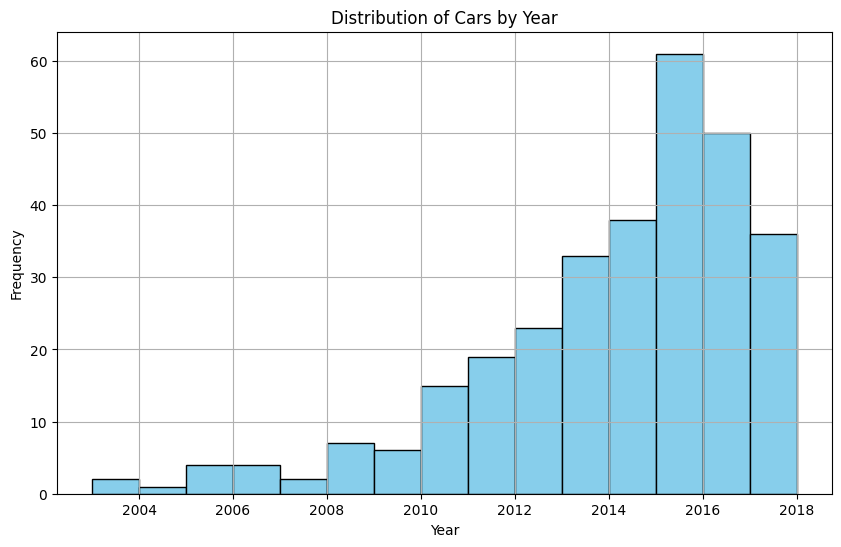

In [ ]:
min_year = dataset['Year'].min()
max_year = dataset['Year'].max()
print(f"Range of years: {min_year} to {max_year}")
plt.figure(figsize=(10, 6))
plt.hist(dataset['Year'], bins=range(dataset['Year'].min(), dataset['Year'].max() + 1), color='skyblue', edgecolor='black')
plt.title('Distribution of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Maximum selling price: 35.0
Minimum selling price: 0.1
Car with Maximum Selling Price of  land cruiser  is in 35.0
Car with Minimum Selling Priceof  Bajaj Pulsar 150  is in 0.1


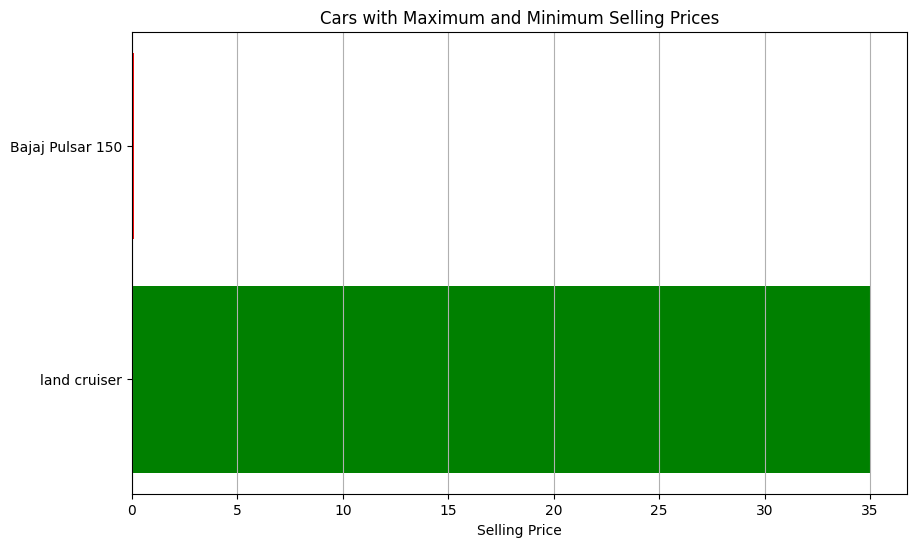

In [ ]:
max_selling_car = dataset.loc[dataset['Selling_Price'].idxmax(), 'Car_Name']
min_selling_car = dataset.loc[dataset['Selling_Price'].idxmin(), 'Car_Name']
max_selling_price = dataset['Selling_Price'].max()
min_selling_price = dataset['Selling_Price'].min()
print("Maximum selling price:", max_selling_price)
print("Minimum selling price:", min_selling_price)
print("Car with Maximum Selling Price of ", max_selling_car," is in",max_selling_price)
print("Car with Minimum Selling Priceof ", min_selling_car," is in",min_selling_price)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh([max_selling_car, min_selling_car], [dataset['Selling_Price'].max(), dataset['Selling_Price'].min()], color=['green', 'red'])
plt.xlabel('Selling Price')
plt.title('Cars with Maximum and Minimum Selling Prices')
plt.grid(axis='x')
plt.show()

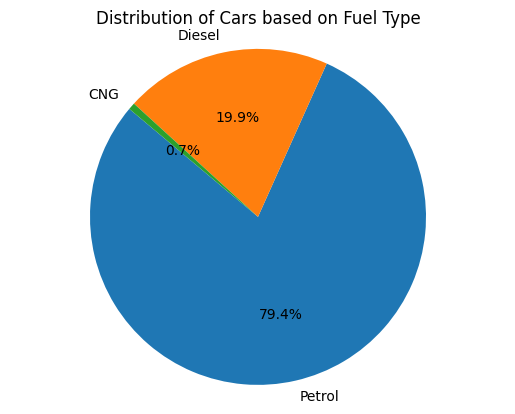

In [ ]:
fuel_type_counts = dataset['Fuel_Type'].value_counts()

# Plotting
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Cars based on Fuel Type')
plt.show()

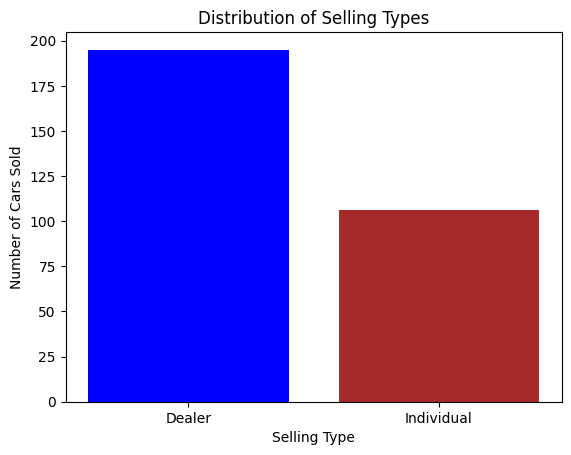

In [ ]:
selling_type_counts = dataset['Selling_type'].value_counts()

# Plot the counts
plt.bar(selling_type_counts.index, selling_type_counts.values, color=['blue', 'brown'])
plt.title('Distribution of Selling Types')
plt.xlabel('Selling Type')
plt.ylabel('Number of Cars Sold')
plt.show()

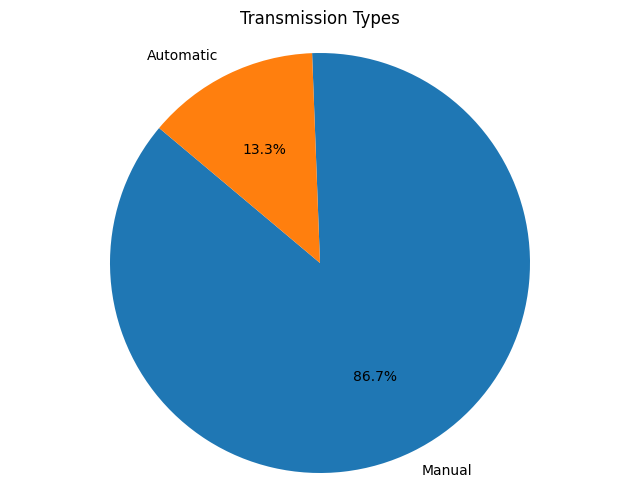

In [ ]:
transmission_counts = dataset['Transmission'].value_counts()

# Plotting the transmission types as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transmission Types')
plt.axis('equal')
plt.show()

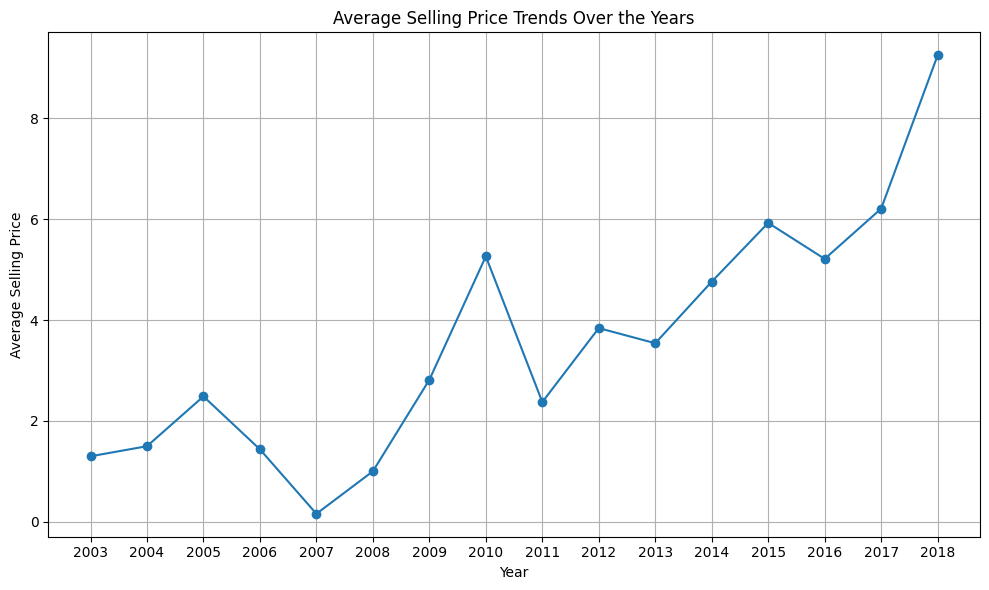

In [ ]:
price_trends = dataset.groupby('Year')['Selling_Price'].mean().reset_index()

# Sorting the DataFrame by year
price_trends = price_trends.sort_values(by='Year')

# Plotting the price trends
plt.figure(figsize=(10, 6))
plt.plot(price_trends['Year'], price_trends['Selling_Price'], marker='o', linestyle='-')
plt.title('Average Selling Price Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.xticks(price_trends['Year'])
plt.tight_layout()
plt.show()

Correlation between Selling Price and owner: -0.0883440990872023


<Figure size 1000x600 with 0 Axes>

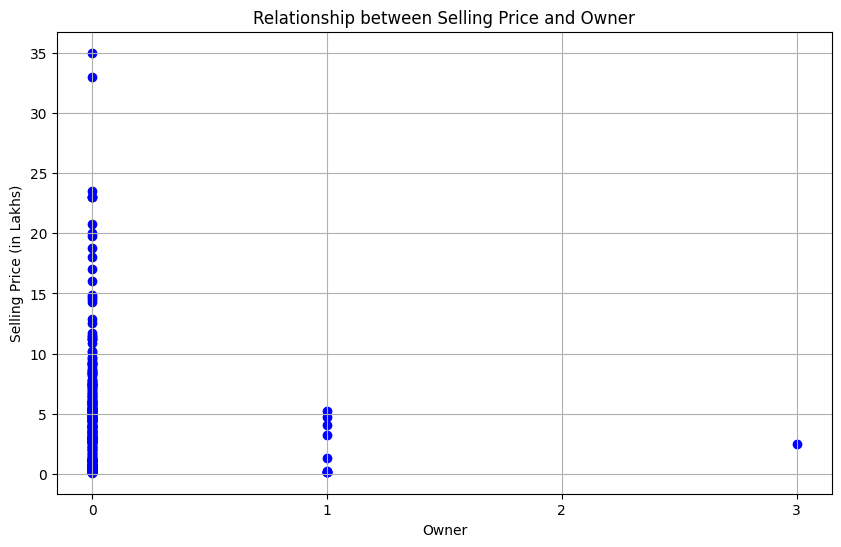

In [ ]:
correlation = dataset['Selling_Price'].corr(dataset['Owner'])

print("Correlation between Selling Price and owner:", correlation)
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Owner'], dataset['Selling_Price'], color='blue')
plt.title('Relationship between Selling Price and Owner')
plt.xlabel('Owner')
plt.ylabel('Selling Price (in Lakhs)')
plt.xticks(range(max(dataset['Owner']) + 1))
plt.grid(True)
plt.show()

Correlation between Selling Price and Driven Kilometers: 0.029187090674291236


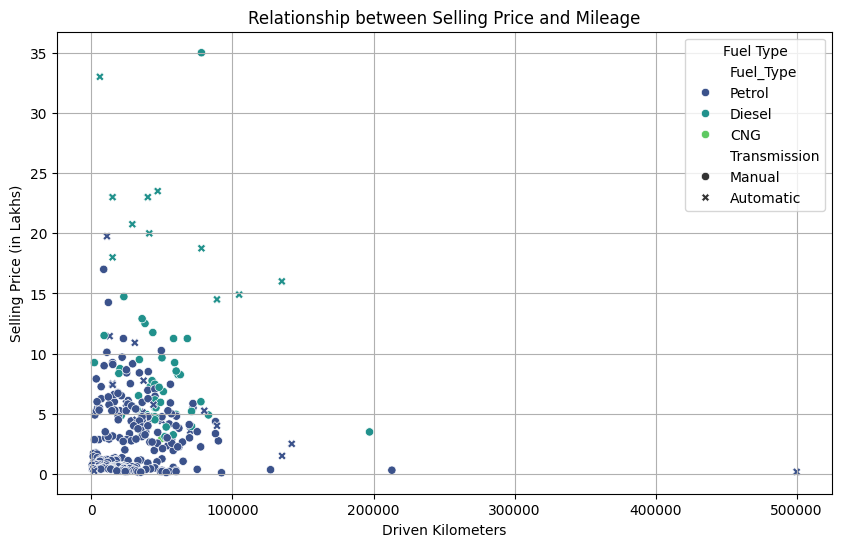

In [ ]:
correlation = dataset['Selling_Price'].corr(dataset['Driven_kms'])

print("Correlation between Selling Price and Driven Kilometers:", correlation)

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Driven_kms", y="Selling_Price", data=dataset, hue="Fuel_Type", style="Transmission", palette="viridis")
plt.title("Relationship between Selling Price and Mileage")
plt.xlabel("Driven Kilometers")
plt.ylabel("Selling Price (in Lakhs)")
plt.legend(title="Fuel Type")
plt.grid(True)
plt.show()


Correlation between Selling Price and years: 0.23614098016042737


<ipython-input-29-1c4fe436f0be>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Year", y="Selling_Price", data=dataset, palette="viridis")


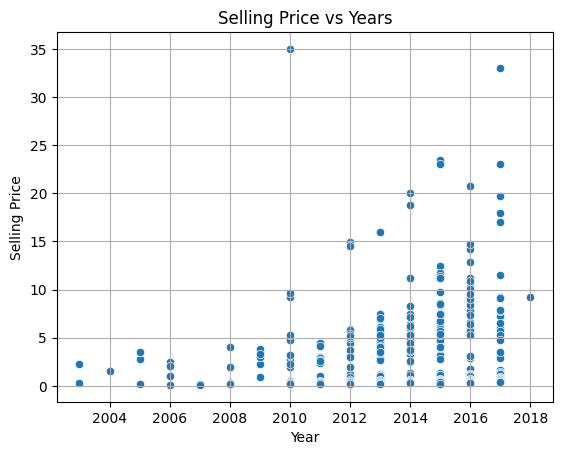

In [ ]:
correlation = dataset['Selling_Price'].corr(dataset['Year'])

print("Correlation between Selling Price and years:", correlation)
sns.scatterplot(x="Year", y="Selling_Price", data=dataset, palette="viridis")
plt.title('Selling Price vs Years')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

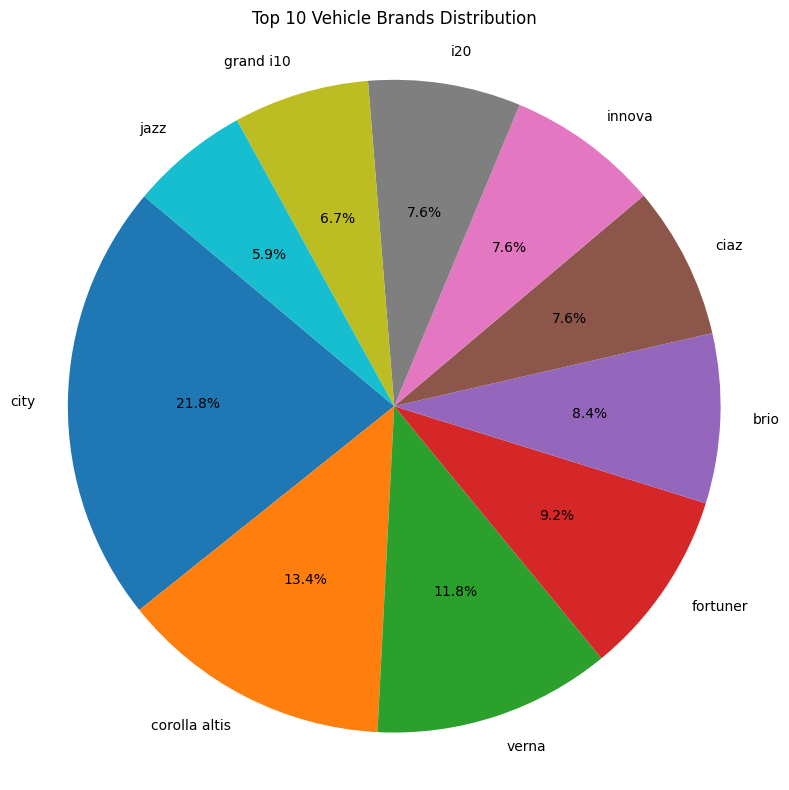

In [ ]:
brand_distribution = dataset['Car_Name'].value_counts()

top_10_brands = brand_distribution.head(10)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_brands, labels=top_10_brands.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Vehicle Brands Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
Car_Name_le = LabelEncoder()
dataset['Car_Name'] = Car_Name_le.fit_transform(dataset['Car_Name'])
Fuel_Type_le = LabelEncoder()
dataset['Fuel_Type'] = Fuel_Type_le.fit_transform(dataset['Fuel_Type'])
Selling_type_le = LabelEncoder()
dataset['Selling_type'] = Selling_type_le.fit_transform(dataset['Selling_type'])
Transmission_le = LabelEncoder()
dataset['Transmission'] = Transmission_le.fit_transform(dataset['Transmission'])

##Split the data into X AND Y
input_data = dataset[["Car_Name","Year","Present_Price", "Driven_kms","Fuel_Type", "Selling_type", "Transmission", "Owner" ]]
output_data = dataset["Selling_Price"]

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
input_data  = pd.DataFrame(ss.fit_transform(input_data),columns = input_data.columns)

input_data.head(2)

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,1.074323,0.128897,-0.236256,-0.256224,0.500183,-0.737285,0.39148,-0.174501
1,1.191828,-0.217514,0.221544,0.155911,-1.852241,-0.737285,0.39148,-0.174501


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_data, output_data , test_size = 0.2, random_state = 42)
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (240, 8) (240,)
Testing set shape: (61, 8) (61,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
train_rmse_lr = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_lr = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_lr}")
print(f"Test RMSE: {test_rmse_lr}\n")
print("R squared for train is :",lr.score(x_train,y_train)*100)
print("R squared for test is :", lr.score(x_test,y_test)*100)

Train RMSE: 1.7532209692165754
Test RMSE: 1.8806967920842026

R squared for train is : 88.37319983657575
R squared for test is : 84.64540623816023


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
train_rmse_rf = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_rf = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_rf}")
print(f"Test RMSE: {test_rmse_rf}\n")
print("R squared for train is :",rf.score(x_train,y_train)*100)
print("R squared for test is :", rf.score(x_test,y_test)*100)

Train RMSE: 0.6408986116838868
Test RMSE: 0.8870886652415302

R squared for train is : 98.44630575530854
R squared for test is : 96.58386658559995


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)
train_rmse_dt = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_dt = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_dt}")
print(f"Test RMSE: {test_rmse_dt}\n")
print("R squared for train is :",dt.score(x_train,y_train)*100)
print("R squared for test is :", dt.score(x_test,y_test)*100)


Train RMSE: 6.206335383118182e-18
Test RMSE: 1.010238569454322

R squared for train is : 100.0
R squared for test is : 95.56954169617808


In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
y_train_pred = svr.predict(x_train)
y_test_pred = svr.predict(x_test)
train_rmse_svr = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_svr = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_svr}")
print(f"Test RMSE: {test_rmse_svr}\n")
print("R squared for train is :",svr.score(x_train,y_train)*100)
print("R squared for test is :", svr.score(x_test,y_test)*100)


Train RMSE: 2.9993150568679416
Test RMSE: 2.2267240866084532

R squared for train is : 65.97241944268558
R squared for test is : 78.47547496129359


In [ ]:
models_performance = {
    "Decision Tree": (test_rmse_dt, dt.score(x_test,y_test)*100),
    "Random Forest": (test_rmse_rf, rf.score(x_test,y_test)*100),
    "Linear Regression": (test_rmse_lr, lr.score(x_test,y_test)*100),
    "Support Vector Regressor": (test_rmse_svr, svr.score(x_test,y_test)*100)
}

sorted_models = sorted(models_performance.items(), key=lambda x: (x[1][0], x[1][1]), reverse=False)

print("Models sorted by RMSE and R squared (Test Set):")
for model, (rmse, r2) in sorted_models:
    print(f"{model}: RMSE = {rmse}, R squared = {r2}")

best_model_name, (best_rmse, best_r2) = sorted_models[0]
print(f"\nBest Model: {best_model_name}")
print(f"RMSE: {best_rmse}")
print(f"R squared: {best_r2}")

Models sorted by RMSE and R squared (Test Set):
Random Forest: RMSE = 0.8870886652415302, R squared = 96.58386658559995
Decision Tree: RMSE = 1.010238569454322, R squared = 95.56954169617808
Linear Regression: RMSE = 1.8806967920842026, R squared = 84.64540623816023
Support Vector Regressor: RMSE = 2.2267240866084532, R squared = 78.47547496129359

Best Model: Random Forest
RMSE: 0.8870886652415302
R squared: 96.58386658559995


In [ ]:
new_data = {
    "Car_Name": "ritz",
    "Year": 2014,
    "Present_Price": 5.59,
    "Driven_kms": 27000,
    "Fuel_Type": "Petrol",
    "Selling_type": "Dealer",
    "Transmission": "Manual",
    "Owner": 0
}
new_data["Car_Name"] = Car_Name_le.transform([new_data["Car_Name"]])[0]
new_data["Fuel_Type"] = Fuel_Type_le.transform([new_data["Fuel_Type"]])[0]
new_data["Selling_type"] = Selling_type_le.transform([new_data["Selling_type"]])[0]
new_data["Transmission"] = Transmission_le.transform([new_data["Transmission"]])[0]
new_data_df = pd.DataFrame([new_data])

new_data_standardized = pd.DataFrame(ss.transform(new_data_df), columns=new_data_df.columns)


predicted_price = rf.predict(new_data_standardized)

print("Predicted Selling Price:", predicted_price)

Predicted Selling Price: [3.8885]


In [ ]:
new_data = {
   "Car_Name": "city",
    "Year": 2019,
    "Present_Price": 10.0,
    "Driven_kms": 5000,
    "Fuel_Type": "Petrol",
    "Selling_type": "Dealer",
    "Transmission": "Manual",
    "Owner": 0
}

new_data["Car_Name"] = Car_Name_le.transform([new_data["Car_Name"]])[0]
new_data["Fuel_Type"] = Fuel_Type_le.transform([new_data["Fuel_Type"]])[0]
new_data["Selling_type"] = Selling_type_le.transform([new_data["Selling_type"]])[0]
new_data["Transmission"] = Transmission_le.transform([new_data["Transmission"]])[0]
new_data_df = pd.DataFrame([new_data])

new_data_standardized = pd.DataFrame(ss.transform(new_data_df), columns=new_data_df.columns)
predicted_price = rf.predict(new_data_standardized)
print("Predicted Selling Price:", predicted_price)

Predicted Selling Price: [7.7087]


In [ ]:
car_name = input("Enter car name: ")
year = int(input("Enter year: "))
present_price = float(input("Enter present price: "))
driven_kms = float(input("Enter driven kilometers: "))
fuel_type = input("Enter fuel type (Petrol/Diesel/CNG): ")
selling_type = input("Enter selling type (Dealer/Individual): ")
transmission = input("Enter transmission type (Manual/Automatic): ")
owner = int(input("Enter number of previous owners: "))

# Encode categorical features
car_name_encoded = Car_Name_le.transform([car_name])[0]
fuel_type_encoded = Fuel_Type_le.transform([fuel_type])[0]
selling_type_encoded = Selling_type_le.transform([selling_type])[0]
transmission_encoded = Transmission_le.transform([transmission])[0]

# Create new data point
new_data_point = [[car_name_encoded, year, present_price, driven_kms, fuel_type_encoded, selling_type_encoded, transmission_encoded, owner]]

# Standardize the new data point
new_data_point_standardized = ss.transform(new_data_point)

# Make prediction
prediction = rf.predict(new_data_point_standardized)

print("Predicted Selling Price:", prediction)


Enter car name: swift
Enter year: 2014
Enter present price: 8
Enter driven kilometers: 40000
Enter fuel type (Petrol/Diesel/CNG): Petrol
Enter selling type (Dealer/Individual): Dealer
Enter transmission type (Manual/Automatic): Automatic
Enter number of previous owners: 0
Predicted Selling Price: [5.353]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
